In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
import tensorflow.keras as tk
import matplotlib.pyplot as plt
# import shap

In [2]:
# Load the dataset
data = pd.read_csv('data/music_features.csv')
print(data.shape)
print(data['genre'].unique())
print(data['genre'].nunique())
data.head()

(2500, 30)
['Pop' 'pop' 'Metal' 'metal' 'disco' 'NewAge' 'Blues' 'blues' 'Latin'
 'World' 'RnB' 'Reggae' 'reggae' 'Electronic' 'classical' 'Rock' 'rock'
 'Folk' 'hiphop' 'Punk' 'Country' 'country' 'Rap' 'Jazz' 'jazz']
25


,filename,genre,tempo,beats,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,Pop-TRWVLJG128F9307271.mp3,Pop,69.837416,34,0.408293,0.224007,2858.783819,2568.014706,5614.349384,0.157585,...,-2.239609,0.568685,-5.098747,5.126700,-6.031083,-0.664729,-5.482568,-0.785592,-0.707880,-2.069501
1,Pop-TROXCBC128F14529AE.mp3,Pop,129.199219,61,0.383293,0.116162,2588.175574,2546.518787,5442.600423,0.127652,...,-4.317134,3.003993,-2.611651,-4.571542,-4.442684,0.995466,-3.879921,1.871848,-3.352596,-1.624789
2,Pop-TRXFYTA128F429364C.mp3,Pop,143.554688,73,0.326810,0.174422,2263.045968,2466.713542,4915.211945,0.098146,...,-12.453062,1.115649,-6.475195,-2.844059,-11.737099,-5.944115,-9.832664,1.110383,-5.764701,-2.384817
3,Pop-TRKXVHR128F428B826.mp3,Pop,143.554688,70,0.364481,0.197582,1805.438441,2146.999805,3776.777162,0.078926,...,-0.345862,-11.273629,-6.434109,4.662772,-4.449849,-3.275714,-1.916390,-7.136373,-3.354441,-3.122026
4,Pop-TRYSIIR128F42333FF.mp3,Pop,89.102909,43,0.417577,0.296791,2622.265385,2567.002404,5549.991440,0.123443,...,0.335742,2.190076,-1.105045,0.857418,-1.936657,0.905115,-4.770248,-1.962681,-5.928404,3.378405


In [3]:
gen = data['genre'].str.lower()
data['genre'] = gen
print(data['genre'].unique())
print(data['genre'].nunique())

['pop' 'metal' 'disco' 'newage' 'blues' 'latin' 'world' 'rnb' 'reggae'
 'electronic' 'classical' 'rock' 'folk' 'hiphop' 'punk' 'country' 'rap'
 'jazz']
18


In [4]:
# Encode the genre labels and get label dictionary
label_encoder = LabelEncoder()
label_encoder.fit(data['genre'])
label_dictionary = dict(zip(data['genre'], label_encoder.transform(data['genre'])))
print(label_dictionary)

{'pop': 11, 'metal': 9, 'disco': 3, 'newage': 10, 'blues': 0, 'latin': 8, 'world': 17, 'rnb': 15, 'reggae': 14, 'electronic': 4, 'classical': 1, 'rock': 16, 'folk': 5, 'hiphop': 6, 'punk': 12, 'country': 2, 'rap': 13, 'jazz': 7}


In [5]:
# adding a column called "label" corresponding to the genre
data['label'] = 0
for i in range(data.shape[0]):
    data.loc[i, 'label'] = label_dictionary[data.loc[i, 'genre']]
data

,filename,genre,tempo,beats,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,Pop-TRWVLJG128F9307271.mp3,pop,69.837416,34,0.408293,0.224007,2858.783819,2568.014706,5614.349384,0.157585,...,0.568685,-5.098747,5.126700,-6.031083,-0.664729,-5.482568,-0.785592,-0.707880,-2.069501,11
1,Pop-TROXCBC128F14529AE.mp3,pop,129.199219,61,0.383293,0.116162,2588.175574,2546.518787,5442.600423,0.127652,...,3.003993,-2.611651,-4.571542,-4.442684,0.995466,-3.879921,1.871848,-3.352596,-1.624789,11
2,Pop-TRXFYTA128F429364C.mp3,pop,143.554688,73,0.326810,0.174422,2263.045968,2466.713542,4915.211945,0.098146,...,1.115649,-6.475195,-2.844059,-11.737099,-5.944115,-9.832664,1.110383,-5.764701,-2.384817,11
3,Pop-TRKXVHR128F428B826.mp3,pop,143.554688,70,0.364481,0.197582,1805.438441,2146.999805,3776.777162,0.078926,...,-11.273629,-6.434109,4.662772,-4.449849,-3.275714,-1.916390,-7.136373,-3.354441,-3.122026,11
4,Pop-TRYSIIR128F42333FF.mp3,pop,89.102909,43,0.417577,0.296791,2622.265385,2567.002404,5549.991440,0.123443,...,2.190076,-1.105045,0.857418,-1.936657,0.905115,-4.770248,-1.962681,-5.928404,3.378405,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,jazz.00027.au,jazz,143.554688,68,0.325170,0.040594,1769.428268,2113.360398,3966.439331,0.062681,...,11.923827,-3.433859,7.191704,-8.850467,4.982307,-4.036403,-0.111063,-0.818210,-0.612190,7
2496,jazz.00076.au,jazz,117.453835,56,0.303217,0.119098,1733.735682,2068.216050,3379.971802,0.068700,...,-5.505905,0.538993,-0.509386,-4.806393,-11.206601,-3.936800,-1.469241,-4.413507,-10.597857,7
2497,jazz.00085.au,jazz,80.749512,38,0.325428,0.071379,2860.683151,2566.170784,5605.161054,0.147559,...,3.414421,-2.899613,3.227199,-1.338827,0.875506,3.679272,0.648434,-0.353716,6.321081,7
2498,jazz.00042.au,jazz,73.828125,34,0.285201,0.099492,1344.620126,1548.989660,2773.095193,0.061186,...,-1.378526,-9.349154,-7.501379,-2.871112,-6.142300,-0.939825,-1.298267,-2.241966,-3.270761,7


In [7]:
# Group the data by genre
grouped = data.groupby('genre')

# Initialize variables for the overall training and test data
X_train = []
y_train = []
X_test = []
y_test = []

# Split each genre into training and test data
for genre, group in grouped:
    X_group = group.drop(['filename', 'genre', 'label'], axis=1).values
    y_group = group['label']

    X_group_train, X_group_test, y_group_train, y_group_test = train_test_split(X_group, y_group, test_size=0.2, random_state=100)

    X_train.extend(X_group_train)
    y_train.extend(y_group_train)
    X_test.extend(X_group_test)
    y_test.extend(y_group_test)

In [8]:
# standard scale training dataset and testing dataset
center = StandardScaler().fit(X_train)
X_train_center = center.transform(X_train)
X_test_center = center.transform(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop, Ftrl
from tensorflow.keras.regularizers import l2
import csv

In [ ]:
header = 'acc layer1 layer2 layer3 regular momentum learningrate epoch batch valid verbose'
header = header.split()
print(header)

['acc', 'layer1', 'layer2', 'layer3', 'regular', 'momentum', 'learningrate', '"epoch', 'batch', 'valid', 'verbose']


In [11]:
# Dimension of features
n_features = X_train_center.shape[1]

layer1 = [128, 256, 512]
layer2 = [128, 256, 512]
layer3 = [128, 256, 512]
regularizer = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
momentum = [0.8, 0.9, 0.99,0.999]
learningrate = [0.1, 0.01, 0.001]
epoch = [100, 200, 250, 500, 1000]
batch_size = [32, 64, 128, 256]
validation = [0.1, 0.2]
verbose = [0, 1]

file = open('data/best_parameter.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

highest = 0

for la1 in layer1:
    for la2 in layer2:
        for la3 in layer3:
            for r in regularizer:
                for m in momentum:
                    for lr in learningrate:
                        for e in epoch:
                            for bs in batch_size:
                                for v in validation:
                                    for verb in verbose:
                                        
                                        model = tk.models.Sequential(name="Deep_Neural_Network", layers=[
                                            
                                            tk.layers.BatchNormalization(momentum = m),
                                            tk.layers.Dense(name="h1", input_dim=n_features,
                                                        units=la1, 
                                                        kernel_regularizer=l2(r), 
                                                        bias_regularizer=l2(r),
                                                        activation='relu'),
                                            tk.layers.BatchNormalization(momentum = m),

                                            #tk.layers.Dropout(name="drop1", rate=0.2),

                                            tk.layers.Dense(name="h2", input_dim=n_features, units=la2, kernel_regularizer=l2(r), bias_regularizer=l2(r),
                                                        activation='relu'), 
                                            tk.layers.BatchNormalization(momentum = m),
                                            # tk.layers.Dropout(name="drop2", rate=0.2),

                                            tk.layers.Dense(name="h3", input_dim=n_features, units=la3, kernel_regularizer=l2(r), bias_regularizer=l2(r),
                                                        activation='relu'),
                                            tk.layers.BatchNormalization(momentum = m),
                                            # tk.layers.Dropout(name="drop3", rate=0.2),

                                            tk.layers.Dense(name="output", units=len(gen.unique()), activation= tf.nn.softmax)
                                        ])

                                        model.compile(loss='sparse_categorical_crossentropy',optimizer=Adadelta(learning_rate=lr),metrics=['accuracy'])

                                        history = model.fit(X_train_center, y_train, epochs=e, batch_size=bs, verbose = verb, validation_split=v)

                                        test_loss, test_accuracy = model.evaluate(X_test_center, y_test)
                                        if test_accuracy > highest:
                                            highest = test_accuracy
                                            append = f'{test_accuracy} {la1} {la2} {la3} {r} {m} {lr} {e} {bs} {v} {verb}' 
                                            file = open('data/best_parameter.csv', 'a', newline='')
                                            with file:
                                                writer = csv.writer(file)
                                                writer.writerow(append.split())




Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-10-16 18:00:56.517845: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-16 18:00:56.519269: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-10-16 18:00:57.208991: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-10-16 18:00:59.751752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:01:19.986617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 109ms/step - loss: 4.2826 - accuracy: 0.3680
Epoch 1/100


2023-10-16 18:03:45.599447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - ETA: 0s - loss: 32.0650 - accuracy: 0.0717

2023-10-16 18:04:03.756618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 24s 226ms/step - loss: 32.0650 - accuracy: 0.0717 - val_loss: 31.2983 - val_accuracy: 0.0350
Epoch 2/100
57/57 [==============================] - 2s 32ms/step - loss: 29.5854 - accuracy: 0.1556 - val_loss: 29.2610 - val_accuracy: 0.0400
Epoch 3/100
57/57 [==============================] - 2s 27ms/step - loss: 27.4777 - accuracy: 0.1989 - val_loss: 27.6062 - val_accuracy: 0.0300
Epoch 4/100
57/57 [==============================] - 2s 27ms/step - loss: 25.6279 - accuracy: 0.2439 - val_loss: 25.9327 - val_accuracy: 0.0250
Epoch 5/100
57/57 [==============================] - 2s 27ms/step - loss: 23.9860 - accuracy: 0.2722 - val_loss: 24.4563 - val_accuracy: 0.0100
Epoch 6/100
57/57 [==============================] - 2s 27ms/step - loss: 22.4826 - accuracy: 0.3000 - val_loss: 23.0522 - val_accuracy: 0.0250
Epoch 7/100
57/57 [==============================] - 2s 27ms/step - loss: 21.1054 - accuracy: 0.3194 - val_loss: 22.1706 - val_accuracy: 0.0000e+0

2023-10-16 18:06:41.598417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:06:54.032973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 1s 93ms/step - loss: 4.4404 - accuracy: 0.3640
Epoch 1/100


2023-10-16 18:08:50.917166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 32.2184 - accuracy: 0.0756

2023-10-16 18:09:03.421885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 18s 137ms/step - loss: 32.2184 - accuracy: 0.0756 - val_loss: 31.4023 - val_accuracy: 0.0350
Epoch 2/100
50/50 [==============================] - 1s 29ms/step - loss: 29.8828 - accuracy: 0.1663 - val_loss: 29.6546 - val_accuracy: 0.0425
Epoch 3/100
50/50 [==============================] - 1s 26ms/step - loss: 27.9350 - accuracy: 0.2212 - val_loss: 27.9831 - val_accuracy: 0.0375
Epoch 4/100
50/50 [==============================] - 1s 24ms/step - loss: 26.1736 - accuracy: 0.2631 - val_loss: 26.5359 - val_accuracy: 0.0350
Epoch 5/100
50/50 [==============================] - 1s 25ms/step - loss: 24.5849 - accuracy: 0.3125 - val_loss: 25.1866 - val_accuracy: 0.0325
Epoch 6/100
50/50 [==============================] - 1s 24ms/step - loss: 23.1167 - accuracy: 0.3231 - val_loss: 23.7962 - val_accuracy: 0.0325
Epoch 7/100
50/50 [==============================] - 1s 30ms/step - loss: 21.7569 - accuracy: 0.3431 - val_loss: 22.6686 - val_accuracy: 0.0325
Ep

2023-10-16 18:11:14.607988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:11:31.764897: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 88ms/step - loss: 5.4653 - accuracy: 0.3680
Epoch 1/100


2023-10-16 18:12:42.982544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - ETA: 0s - loss: 32.5841 - accuracy: 0.0600

2023-10-16 18:12:59.576609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 22s 381ms/step - loss: 32.5841 - accuracy: 0.0600 - val_loss: 31.9740 - val_accuracy: 0.0400
Epoch 2/100
29/29 [==============================] - 1s 30ms/step - loss: 30.8585 - accuracy: 0.1139 - val_loss: 30.7981 - val_accuracy: 0.0400
Epoch 3/100
29/29 [==============================] - 1s 26ms/step - loss: 29.4086 - accuracy: 0.1583 - val_loss: 29.4824 - val_accuracy: 0.0350
Epoch 4/100
29/29 [==============================] - 1s 25ms/step - loss: 28.1021 - accuracy: 0.1989 - val_loss: 28.4178 - val_accuracy: 0.0450
Epoch 5/100
29/29 [==============================] - 1s 26ms/step - loss: 26.8955 - accuracy: 0.2411 - val_loss: 27.3902 - val_accuracy: 0.0400
Epoch 6/100
29/29 [==============================] - 1s 27ms/step - loss: 25.7790 - accuracy: 0.2700 - val_loss: 26.3771 - val_accuracy: 0.0250
Epoch 7/100
29/29 [==============================] - 1s 27ms/step - loss: 24.7682 - accuracy: 0.2850 - val_loss: 25.5207 - val_accuracy: 0.0150
Ep

2023-10-16 18:14:23.161091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:14:33.219681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 91ms/step - loss: 4.7441 - accuracy: 0.3560
Epoch 1/100


2023-10-16 18:15:36.150537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/25 [===========================>..] - ETA: 0s - loss: 32.7125 - accuracy: 0.0658

2023-10-16 18:15:47.069530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 17s 262ms/step - loss: 32.6821 - accuracy: 0.0650 - val_loss: 32.0293 - val_accuracy: 0.0375
Epoch 2/100
25/25 [==============================] - 1s 29ms/step - loss: 31.1212 - accuracy: 0.1181 - val_loss: 30.8620 - val_accuracy: 0.0350
Epoch 3/100
25/25 [==============================] - 1s 24ms/step - loss: 29.7456 - accuracy: 0.1650 - val_loss: 29.7807 - val_accuracy: 0.0425
Epoch 4/100
25/25 [==============================] - 1s 24ms/step - loss: 28.4760 - accuracy: 0.2131 - val_loss: 28.7600 - val_accuracy: 0.0325
Epoch 5/100
25/25 [==============================] - 1s 25ms/step - loss: 27.2798 - accuracy: 0.2400 - val_loss: 27.6929 - val_accuracy: 0.0325
Epoch 6/100
25/25 [==============================] - 1s 24ms/step - loss: 26.1365 - accuracy: 0.2875 - val_loss: 26.7741 - val_accuracy: 0.0400
Epoch 7/100
25/25 [==============================] - 1s 24ms/step - loss: 25.0892 - accuracy: 0.3169 - val_loss: 25.8005 - val_accuracy: 0.0325
Ep

2023-10-16 18:16:56.398883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:17:13.797280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 92ms/step - loss: 9.3318 - accuracy: 0.3400
Epoch 1/100


2023-10-16 18:17:58.882575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 32.9429 - accuracy: 0.0450

2023-10-16 18:18:15.696956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 22s 757ms/step - loss: 32.9429 - accuracy: 0.0450 - val_loss: 32.4286 - val_accuracy: 0.0450
Epoch 2/100
15/15 [==============================] - 1s 45ms/step - loss: 31.8661 - accuracy: 0.0706 - val_loss: 31.8404 - val_accuracy: 0.0450
Epoch 3/100
15/15 [==============================] - 0s 30ms/step - loss: 30.9477 - accuracy: 0.1128 - val_loss: 31.0909 - val_accuracy: 0.0350
Epoch 4/100
15/15 [==============================] - 0s 30ms/step - loss: 30.1079 - accuracy: 0.1467 - val_loss: 30.3416 - val_accuracy: 0.0400
Epoch 5/100
15/15 [==============================] - 0s 27ms/step - loss: 29.3573 - accuracy: 0.1678 - val_loss: 29.7230 - val_accuracy: 0.0400
Epoch 6/100
15/15 [==============================] - 0s 29ms/step - loss: 28.6408 - accuracy: 0.1989 - val_loss: 29.1974 - val_accuracy: 0.0400
Epoch 7/100
15/15 [==============================] - 0s 32ms/step - loss: 27.9752 - accuracy: 0.2139 - val_loss: 28.6664 - val_accuracy: 0.0200
Ep

2023-10-16 18:19:02.841856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:19:19.367453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 117ms/step - loss: 5.7018 - accuracy: 0.3440
Epoch 1/100


2023-10-16 18:20:04.328956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 33.0236 - accuracy: 0.0437

2023-10-16 18:20:21.347454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 25s 861ms/step - loss: 33.0236 - accuracy: 0.0437 - val_loss: 32.3091 - val_accuracy: 0.0275
Epoch 2/100
13/13 [==============================] - 1s 37ms/step - loss: 31.9931 - accuracy: 0.0744 - val_loss: 31.7639 - val_accuracy: 0.0375
Epoch 3/100
13/13 [==============================] - 1s 42ms/step - loss: 31.0767 - accuracy: 0.1175 - val_loss: 31.0718 - val_accuracy: 0.0325
Epoch 4/100
13/13 [==============================] - 0s 35ms/step - loss: 30.2235 - accuracy: 0.1481 - val_loss: 30.3629 - val_accuracy: 0.0300
Epoch 5/100
13/13 [==============================] - 0s 30ms/step - loss: 29.4240 - accuracy: 0.1975 - val_loss: 29.7024 - val_accuracy: 0.0350
Epoch 6/100
13/13 [==============================] - 0s 40ms/step - loss: 28.6403 - accuracy: 0.2237 - val_loss: 29.0804 - val_accuracy: 0.0350
Epoch 7/100
13/13 [==============================] - 0s 28ms/step - loss: 27.8854 - accuracy: 0.2531 - val_loss: 28.4175 - val_accuracy: 0.0400
Ep

2023-10-16 18:21:04.272903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:21:22.451505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 121ms/step - loss: 15.9848 - accuracy: 0.3220
Epoch 1/100


2023-10-16 18:21:52.943779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 33.2068 - accuracy: 0.0422

2023-10-16 18:22:13.354803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 25s 2s/step - loss: 33.2068 - accuracy: 0.0422 - val_loss: 32.4902 - val_accuracy: 0.0450
Epoch 2/100
8/8 [==============================] - 1s 73ms/step - loss: 32.5419 - accuracy: 0.0572 - val_loss: 32.2866 - val_accuracy: 0.0300
Epoch 3/100
8/8 [==============================] - 0s 57ms/step - loss: 31.9885 - accuracy: 0.0728 - val_loss: 32.0856 - val_accuracy: 0.0450
Epoch 4/100
8/8 [==============================] - 1s 80ms/step - loss: 31.4911 - accuracy: 0.0917 - val_loss: 31.6791 - val_accuracy: 0.0450
Epoch 5/100
8/8 [==============================] - 0s 38ms/step - loss: 31.0299 - accuracy: 0.1067 - val_loss: 31.3292 - val_accuracy: 0.0350
Epoch 6/100
8/8 [==============================] - 0s 43ms/step - loss: 30.5898 - accuracy: 0.1211 - val_loss: 30.9277 - val_accuracy: 0.0450
Epoch 7/100
8/8 [==============================] - 0s 41ms/step - loss: 30.1808 - accuracy: 0.1378 - val_loss: 30.5725 - val_accuracy: 0.0600
Epoch 8/100
8/8 [==

2023-10-16 18:22:48.660822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:23:07.405004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 120ms/step - loss: 8.9518 - accuracy: 0.3540
Epoch 1/100


2023-10-16 18:23:38.439431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 33.2497 - accuracy: 0.0394

2023-10-16 18:23:57.616052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 26s 2s/step - loss: 33.2497 - accuracy: 0.0394 - val_loss: 32.4399 - val_accuracy: 0.0175
Epoch 2/100
7/7 [==============================] - 1s 100ms/step - loss: 32.6121 - accuracy: 0.0581 - val_loss: 32.1958 - val_accuracy: 0.0250
Epoch 3/100
7/7 [==============================] - 1s 104ms/step - loss: 32.0404 - accuracy: 0.0781 - val_loss: 31.9241 - val_accuracy: 0.0275
Epoch 4/100
7/7 [==============================] - 0s 32ms/step - loss: 31.4885 - accuracy: 0.0994 - val_loss: 31.5342 - val_accuracy: 0.0325
Epoch 5/100
7/7 [==============================] - 0s 74ms/step - loss: 30.9623 - accuracy: 0.1219 - val_loss: 31.1432 - val_accuracy: 0.0275
Epoch 6/100
7/7 [==============================] - 0s 50ms/step - loss: 30.4560 - accuracy: 0.1531 - val_loss: 30.7477 - val_accuracy: 0.0300
Epoch 7/100
7/7 [==============================] - 0s 31ms/step - loss: 29.9666 - accuracy: 0.1806 - val_loss: 30.3200 - val_accuracy: 0.0375
Epoch 8/100
7/7 [

2023-10-16 18:24:41.914123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:25:12.957242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 269ms/step - loss: 3.8757 - accuracy: 0.3460
Epoch 1/200


2023-10-16 18:31:37.657646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - ETA: 0s - loss: 32.0894 - accuracy: 0.0833

2023-10-16 18:32:17.067082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 73s 434ms/step - loss: 32.0894 - accuracy: 0.0833 - val_loss: 31.2744 - val_accuracy: 0.0350
Epoch 2/200
57/57 [==============================] - 4s 68ms/step - loss: 29.5322 - accuracy: 0.1533 - val_loss: 29.1002 - val_accuracy: 0.0650
Epoch 3/200
57/57 [==============================] - 3s 57ms/step - loss: 27.4566 - accuracy: 0.1967 - val_loss: 27.4277 - val_accuracy: 0.0450
Epoch 4/200
57/57 [==============================] - 3s 47ms/step - loss: 25.5936 - accuracy: 0.2511 - val_loss: 25.8631 - val_accuracy: 0.0450
Epoch 5/200
57/57 [==============================] - 3s 49ms/step - loss: 23.9555 - accuracy: 0.2744 - val_loss: 24.5751 - val_accuracy: 0.0100
Epoch 6/200
57/57 [==============================] - 3s 45ms/step - loss: 22.4578 - accuracy: 0.2967 - val_loss: 22.9162 - val_accuracy: 0.0300
Epoch 7/200
57/57 [==============================] - 3s 49ms/step - loss: 21.0578 - accuracy: 0.3233 - val_loss: 21.8332 - val_accuracy: 0.0150
Ep

2023-10-16 18:39:54.023887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:40:14.019656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 191ms/step - loss: 4.1459 - accuracy: 0.3760
Epoch 1/200


2023-10-16 18:45:22.700883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/50 [============================>.] - ETA: 0s - loss: 32.2408 - accuracy: 0.0689

2023-10-16 18:45:48.877811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 38s 298ms/step - loss: 32.2139 - accuracy: 0.0706 - val_loss: 31.3193 - val_accuracy: 0.0375
Epoch 2/200
50/50 [==============================] - 2s 39ms/step - loss: 29.8461 - accuracy: 0.1631 - val_loss: 29.5744 - val_accuracy: 0.0300
Epoch 3/200
50/50 [==============================] - 2s 40ms/step - loss: 27.9119 - accuracy: 0.2256 - val_loss: 27.9570 - val_accuracy: 0.0350
Epoch 4/200
50/50 [==============================] - 2s 31ms/step - loss: 26.1295 - accuracy: 0.2719 - val_loss: 26.4446 - val_accuracy: 0.0300
Epoch 5/200
50/50 [==============================] - 2s 36ms/step - loss: 24.4983 - accuracy: 0.3081 - val_loss: 25.0380 - val_accuracy: 0.0350
Epoch 6/200
50/50 [==============================] - 2s 42ms/step - loss: 23.0234 - accuracy: 0.3369 - val_loss: 23.7391 - val_accuracy: 0.0250
Epoch 7/200
50/50 [==============================] - 2s 42ms/step - loss: 21.6865 - accuracy: 0.3438 - val_loss: 22.5738 - val_accuracy: 0.0200
Ep

2023-10-16 18:50:38.543850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:51:06.993814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 140ms/step - loss: 4.2467 - accuracy: 0.3540
Epoch 1/200


2023-10-16 18:53:50.856722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - ETA: 0s - loss: 32.5778 - accuracy: 0.0556

2023-10-16 18:54:14.602417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 31s 527ms/step - loss: 32.5778 - accuracy: 0.0556 - val_loss: 32.0424 - val_accuracy: 0.0450
Epoch 2/200
29/29 [==============================] - 1s 40ms/step - loss: 30.8704 - accuracy: 0.1139 - val_loss: 30.7628 - val_accuracy: 0.0200
Epoch 3/200
29/29 [==============================] - 1s 42ms/step - loss: 29.4063 - accuracy: 0.1606 - val_loss: 29.5068 - val_accuracy: 0.0500
Epoch 4/200
29/29 [==============================] - 1s 38ms/step - loss: 28.0728 - accuracy: 0.2211 - val_loss: 28.3370 - val_accuracy: 0.0450
Epoch 5/200
29/29 [==============================] - 1s 37ms/step - loss: 26.8587 - accuracy: 0.2456 - val_loss: 27.3947 - val_accuracy: 0.0300
Epoch 6/200
29/29 [==============================] - 1s 37ms/step - loss: 25.7220 - accuracy: 0.2744 - val_loss: 26.3741 - val_accuracy: 0.0300
Epoch 7/200
29/29 [==============================] - 1s 34ms/step - loss: 24.6532 - accuracy: 0.2878 - val_loss: 25.3531 - val_accuracy: 0.0250
Ep

2023-10-16 18:57:26.391102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 18:57:43.566707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 146ms/step - loss: 4.1348 - accuracy: 0.3400
Epoch 1/200


2023-10-16 19:00:06.232344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/25 [===========================>..] - ETA: 0s - loss: 32.6983 - accuracy: 0.0625

2023-10-16 19:00:22.524447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 24s 367ms/step - loss: 32.6786 - accuracy: 0.0613 - val_loss: 31.9988 - val_accuracy: 0.0300
Epoch 2/200
25/25 [==============================] - 1s 39ms/step - loss: 31.1210 - accuracy: 0.1081 - val_loss: 30.8416 - val_accuracy: 0.0350
Epoch 3/200
25/25 [==============================] - 1s 45ms/step - loss: 29.7392 - accuracy: 0.1637 - val_loss: 29.7953 - val_accuracy: 0.0350
Epoch 4/200
25/25 [==============================] - 1s 29ms/step - loss: 28.4972 - accuracy: 0.2212 - val_loss: 28.7626 - val_accuracy: 0.0400
Epoch 5/200
25/25 [==============================] - 1s 29ms/step - loss: 27.2910 - accuracy: 0.2419 - val_loss: 27.7283 - val_accuracy: 0.0400
Epoch 6/200
25/25 [==============================] - 1s 28ms/step - loss: 26.1733 - accuracy: 0.2738 - val_loss: 26.7712 - val_accuracy: 0.0350
Epoch 7/200
25/25 [==============================] - 1s 32ms/step - loss: 25.0967 - accuracy: 0.3125 - val_loss: 25.8065 - val_accuracy: 0.0350
Ep

2023-10-16 19:02:51.989227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 19:03:15.174852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 134ms/step - loss: 6.2382 - accuracy: 0.3380
Epoch 1/200


2023-10-16 19:04:52.229259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 32.9458 - accuracy: 0.0494

2023-10-16 19:05:13.595100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 29s 1s/step - loss: 32.9458 - accuracy: 0.0494 - val_loss: 32.3670 - val_accuracy: 0.0450
Epoch 2/200
15/15 [==============================] - 1s 52ms/step - loss: 31.8375 - accuracy: 0.0767 - val_loss: 31.7523 - val_accuracy: 0.0450
Epoch 3/200
15/15 [==============================] - 1s 47ms/step - loss: 30.9234 - accuracy: 0.1056 - val_loss: 31.0253 - val_accuracy: 0.0500
Epoch 4/200
15/15 [==============================] - 1s 78ms/step - loss: 30.0617 - accuracy: 0.1383 - val_loss: 30.3212 - val_accuracy: 0.0300
Epoch 5/200
15/15 [==============================] - 1s 73ms/step - loss: 29.2712 - accuracy: 0.1739 - val_loss: 29.7227 - val_accuracy: 0.0300
Epoch 6/200
15/15 [==============================] - 1s 50ms/step - loss: 28.5300 - accuracy: 0.1950 - val_loss: 29.0470 - val_accuracy: 0.0300
Epoch 7/200
15/15 [==============================] - 1s 36ms/step - loss: 27.8676 - accuracy: 0.2156 - val_loss: 28.4162 - val_accuracy: 0.0400
Epoch

2023-10-16 19:06:59.324720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 19:07:20.792950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 111ms/step - loss: 4.2124 - accuracy: 0.3400
Epoch 1/200


2023-10-16 19:08:40.792185: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 33.0270 - accuracy: 0.0494

2023-10-16 19:09:02.589599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 29s 1s/step - loss: 33.0270 - accuracy: 0.0494 - val_loss: 32.3078 - val_accuracy: 0.0225
Epoch 2/200
13/13 [==============================] - 1s 63ms/step - loss: 32.0020 - accuracy: 0.0838 - val_loss: 31.7555 - val_accuracy: 0.0300
Epoch 3/200
13/13 [==============================] - 1s 52ms/step - loss: 31.0967 - accuracy: 0.1213 - val_loss: 31.0560 - val_accuracy: 0.0350
Epoch 4/200
13/13 [==============================] - 1s 48ms/step - loss: 30.2355 - accuracy: 0.1556 - val_loss: 30.4069 - val_accuracy: 0.0350
Epoch 5/200
13/13 [==============================] - 0s 31ms/step - loss: 29.4340 - accuracy: 0.1919 - val_loss: 29.7010 - val_accuracy: 0.0275
Epoch 6/200
13/13 [==============================] - 0s 32ms/step - loss: 28.6438 - accuracy: 0.2231 - val_loss: 29.0755 - val_accuracy: 0.0325
Epoch 7/200
13/13 [==============================] - 0s 29ms/step - loss: 27.8890 - accuracy: 0.2619 - val_loss: 28.4432 - val_accuracy: 0.0425
Epoch

2023-10-16 19:10:38.856436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 19:11:03.125851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 134ms/step - loss: 10.7133 - accuracy: 0.3200
Epoch 1/200


2023-10-16 19:12:03.470627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 33.1995 - accuracy: 0.0389

2023-10-16 19:12:25.124448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 27s 2s/step - loss: 33.1995 - accuracy: 0.0389 - val_loss: 32.5041 - val_accuracy: 0.0500
Epoch 2/200
8/8 [==============================] - 1s 78ms/step - loss: 32.5402 - accuracy: 0.0578 - val_loss: 32.3613 - val_accuracy: 0.0350
Epoch 3/200
8/8 [==============================] - 1s 100ms/step - loss: 32.0066 - accuracy: 0.0750 - val_loss: 32.0605 - val_accuracy: 0.0350
Epoch 4/200
8/8 [==============================] - 0s 51ms/step - loss: 31.5179 - accuracy: 0.0894 - val_loss: 31.6871 - val_accuracy: 0.0300
Epoch 5/200
8/8 [==============================] - 1s 97ms/step - loss: 31.0439 - accuracy: 0.1133 - val_loss: 31.3814 - val_accuracy: 0.0500
Epoch 6/200
8/8 [==============================] - 0s 32ms/step - loss: 30.6275 - accuracy: 0.1206 - val_loss: 30.9883 - val_accuracy: 0.0350
Epoch 7/200
8/8 [==============================] - 0s 48ms/step - loss: 30.2184 - accuracy: 0.1422 - val_loss: 30.7219 - val_accuracy: 0.0400
Epoch 8/200
8/8 [=

2023-10-16 19:13:25.271038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 19:13:47.026823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 5s 159ms/step - loss: 5.3368 - accuracy: 0.3540
Epoch 1/200


2023-10-16 19:14:43.152152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 33.2647 - accuracy: 0.0431

2023-10-16 19:15:05.534657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 29s 2s/step - loss: 33.2647 - accuracy: 0.0431 - val_loss: 32.4630 - val_accuracy: 0.0225
Epoch 2/200
7/7 [==============================] - 1s 96ms/step - loss: 32.6203 - accuracy: 0.0531 - val_loss: 32.2403 - val_accuracy: 0.0225
Epoch 3/200
7/7 [==============================] - 1s 89ms/step - loss: 32.0431 - accuracy: 0.0731 - val_loss: 31.9039 - val_accuracy: 0.0325
Epoch 4/200
7/7 [==============================] - 0s 53ms/step - loss: 31.5029 - accuracy: 0.0988 - val_loss: 31.5211 - val_accuracy: 0.0425
Epoch 5/200
7/7 [==============================] - 1s 104ms/step - loss: 30.9632 - accuracy: 0.1300 - val_loss: 31.1119 - val_accuracy: 0.0375
Epoch 6/200
7/7 [==============================] - 0s 41ms/step - loss: 30.4555 - accuracy: 0.1444 - val_loss: 30.7382 - val_accuracy: 0.0300
Epoch 7/200
7/7 [==============================] - 0s 44ms/step - loss: 29.9870 - accuracy: 0.1700 - val_loss: 30.3388 - val_accuracy: 0.0325
Epoch 8/200
7/7 [=

2023-10-16 19:16:11.092687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 19:16:35.125089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 133ms/step - loss: 4.0803 - accuracy: 0.3420
Epoch 1/250


2023-10-16 19:23:02.854333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - ETA: 0s - loss: 32.0551 - accuracy: 0.0700

2023-10-16 19:23:27.041471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 32s 295ms/step - loss: 32.0551 - accuracy: 0.0700 - val_loss: 31.1692 - val_accuracy: 0.0550
Epoch 2/250
57/57 [==============================] - 2s 37ms/step - loss: 29.5861 - accuracy: 0.1594 - val_loss: 29.2217 - val_accuracy: 0.0400
Epoch 3/250
57/57 [==============================] - 2s 31ms/step - loss: 27.4818 - accuracy: 0.1956 - val_loss: 27.4962 - val_accuracy: 0.0400
Epoch 4/250
57/57 [==============================] - 2s 29ms/step - loss: 25.6433 - accuracy: 0.2461 - val_loss: 25.8770 - val_accuracy: 0.0300
Epoch 5/250
57/57 [==============================] - 2s 28ms/step - loss: 24.0029 - accuracy: 0.2733 - val_loss: 24.3535 - val_accuracy: 0.0300
Epoch 6/250
57/57 [==============================] - 2s 32ms/step - loss: 22.4993 - accuracy: 0.2906 - val_loss: 23.1425 - val_accuracy: 0.0400
Epoch 7/250
57/57 [==============================] - 2s 30ms/step - loss: 21.1610 - accuracy: 0.3128 - val_loss: 21.9232 - val_accuracy: 0.0250
Ep

2023-10-16 19:29:55.937699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 19:30:11.935595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 167ms/step - loss: 4.2886 - accuracy: 0.3460
Epoch 1/250


2023-10-16 19:35:02.686597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/50 [===========================>..] - ETA: 0s - loss: 32.2027 - accuracy: 0.0801

2023-10-16 19:35:19.818923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 26s 209ms/step - loss: 32.1640 - accuracy: 0.0787 - val_loss: 31.2831 - val_accuracy: 0.0350
Epoch 2/250
50/50 [==============================] - 2s 34ms/step - loss: 29.8662 - accuracy: 0.1594 - val_loss: 29.5017 - val_accuracy: 0.0325
Epoch 3/250
50/50 [==============================] - 1s 26ms/step - loss: 27.8898 - accuracy: 0.2262 - val_loss: 27.9203 - val_accuracy: 0.0375
Epoch 4/250
50/50 [==============================] - 2s 30ms/step - loss: 26.1247 - accuracy: 0.2694 - val_loss: 26.4809 - val_accuracy: 0.0375
Epoch 5/250
50/50 [==============================] - 1s 28ms/step - loss: 24.5048 - accuracy: 0.3094 - val_loss: 25.0390 - val_accuracy: 0.0250
Epoch 6/250
50/50 [==============================] - 1s 26ms/step - loss: 23.0417 - accuracy: 0.3088 - val_loss: 23.7387 - val_accuracy: 0.0275
Epoch 7/250
50/50 [==============================] - 1s 24ms/step - loss: 21.6639 - accuracy: 0.3500 - val_loss: 22.5294 - val_accuracy: 0.0275
Ep

2023-10-16 19:41:07.497413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 19:41:39.357034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 143ms/step - loss: 4.1062 - accuracy: 0.3700
Epoch 1/250


2023-10-16 19:44:49.240193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - ETA: 0s - loss: 32.5709 - accuracy: 0.0589

2023-10-16 19:45:11.452386: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 30s 570ms/step - loss: 32.5709 - accuracy: 0.0589 - val_loss: 32.0375 - val_accuracy: 0.0300
Epoch 2/250
29/29 [==============================] - 1s 41ms/step - loss: 30.8809 - accuracy: 0.1006 - val_loss: 30.6204 - val_accuracy: 0.0450
Epoch 3/250
29/29 [==============================] - 1s 46ms/step - loss: 29.4162 - accuracy: 0.1706 - val_loss: 29.4482 - val_accuracy: 0.0400
Epoch 4/250
29/29 [==============================] - 1s 29ms/step - loss: 28.1202 - accuracy: 0.2094 - val_loss: 28.3637 - val_accuracy: 0.0300
Epoch 5/250
29/29 [==============================] - 1s 38ms/step - loss: 26.9219 - accuracy: 0.2422 - val_loss: 27.3523 - val_accuracy: 0.0050
Epoch 6/250
29/29 [==============================] - 1s 30ms/step - loss: 25.7953 - accuracy: 0.2606 - val_loss: 26.4139 - val_accuracy: 0.0300
Epoch 7/250
29/29 [==============================] - 1s 31ms/step - loss: 24.7523 - accuracy: 0.2744 - val_loss: 25.5670 - val_accuracy: 0.0200
Ep

2023-10-16 19:48:19.604092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 19:48:34.259788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 116ms/step - loss: 4.0501 - accuracy: 0.3520
Epoch 1/250


2023-10-16 19:50:47.636292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/25 [==========================>...] - ETA: 0s - loss: 32.7329 - accuracy: 0.0564

2023-10-16 19:51:03.087120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 23s 376ms/step - loss: 32.6607 - accuracy: 0.0606 - val_loss: 31.9573 - val_accuracy: 0.0325
Epoch 2/250
25/25 [==============================] - 1s 51ms/step - loss: 31.1081 - accuracy: 0.1163 - val_loss: 30.8074 - val_accuracy: 0.0350
Epoch 3/250
25/25 [==============================] - 1s 37ms/step - loss: 29.6944 - accuracy: 0.1744 - val_loss: 29.7129 - val_accuracy: 0.0350
Epoch 4/250
25/25 [==============================] - 1s 40ms/step - loss: 28.4277 - accuracy: 0.2131 - val_loss: 28.6821 - val_accuracy: 0.0300
Epoch 5/250
25/25 [==============================] - 1s 37ms/step - loss: 27.2291 - accuracy: 0.2625 - val_loss: 27.6359 - val_accuracy: 0.0375
Epoch 6/250
25/25 [==============================] - 1s 26ms/step - loss: 26.0960 - accuracy: 0.2912 - val_loss: 26.7175 - val_accuracy: 0.0325
Epoch 7/250
25/25 [==============================] - 1s 22ms/step - loss: 25.0544 - accuracy: 0.3094 - val_loss: 25.7457 - val_accuracy: 0.0325
Ep

2023-10-16 19:53:55.249604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 19:54:22.488899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 112ms/step - loss: 5.6658 - accuracy: 0.3480
Epoch 1/250


2023-10-16 19:55:55.698325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 32.9454 - accuracy: 0.0506

2023-10-16 19:56:17.776492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 28s 941ms/step - loss: 32.9454 - accuracy: 0.0506 - val_loss: 32.3248 - val_accuracy: 0.0250
Epoch 2/250
15/15 [==============================] - 1s 56ms/step - loss: 31.8531 - accuracy: 0.0733 - val_loss: 31.6641 - val_accuracy: 0.0700
Epoch 3/250
15/15 [==============================] - 1s 43ms/step - loss: 30.9095 - accuracy: 0.1139 - val_loss: 31.0240 - val_accuracy: 0.0550
Epoch 4/250
15/15 [==============================] - 1s 61ms/step - loss: 30.0677 - accuracy: 0.1456 - val_loss: 30.3221 - val_accuracy: 0.0350
Epoch 5/250
15/15 [==============================] - 1s 53ms/step - loss: 29.2965 - accuracy: 0.1694 - val_loss: 29.7563 - val_accuracy: 0.0400
Epoch 6/250
15/15 [==============================] - 1s 67ms/step - loss: 28.5810 - accuracy: 0.1894 - val_loss: 29.1150 - val_accuracy: 0.0250
Epoch 7/250
15/15 [==============================] - 1s 64ms/step - loss: 27.8957 - accuracy: 0.2250 - val_loss: 28.5395 - val_accuracy: 0.0350
Ep

2023-10-16 19:58:00.516825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 19:58:23.457456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 152ms/step - loss: 3.9976 - accuracy: 0.3460
Epoch 1/250


2023-10-16 19:59:50.502981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 33.0365 - accuracy: 0.0487

2023-10-16 20:00:11.752951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 28s 1s/step - loss: 33.0365 - accuracy: 0.0487 - val_loss: 32.3196 - val_accuracy: 0.0225
Epoch 2/250
13/13 [==============================] - 1s 82ms/step - loss: 32.0104 - accuracy: 0.0856 - val_loss: 31.7786 - val_accuracy: 0.0250
Epoch 3/250
13/13 [==============================] - 1s 51ms/step - loss: 31.0976 - accuracy: 0.1112 - val_loss: 31.0678 - val_accuracy: 0.0300
Epoch 4/250
13/13 [==============================] - 1s 77ms/step - loss: 30.2499 - accuracy: 0.1506 - val_loss: 30.4112 - val_accuracy: 0.0350
Epoch 5/250
13/13 [==============================] - 0s 35ms/step - loss: 29.4290 - accuracy: 0.1925 - val_loss: 29.7753 - val_accuracy: 0.0250
Epoch 6/250
13/13 [==============================] - 0s 30ms/step - loss: 28.6528 - accuracy: 0.2237 - val_loss: 29.1300 - val_accuracy: 0.0300
Epoch 7/250
13/13 [==============================] - 0s 38ms/step - loss: 27.9067 - accuracy: 0.2537 - val_loss: 28.4831 - val_accuracy: 0.0325
Epoch

2023-10-16 20:01:44.382727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 20:02:03.798233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 119ms/step - loss: 9.5021 - accuracy: 0.3560
Epoch 1/250


2023-10-16 20:02:57.145829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 33.1892 - accuracy: 0.0428

2023-10-16 20:03:18.668338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 26s 2s/step - loss: 33.1892 - accuracy: 0.0428 - val_loss: 32.4595 - val_accuracy: 0.0250
Epoch 2/250
8/8 [==============================] - 1s 85ms/step - loss: 32.5367 - accuracy: 0.0578 - val_loss: 32.3639 - val_accuracy: 0.0350
Epoch 3/250
8/8 [==============================] - 0s 45ms/step - loss: 31.9933 - accuracy: 0.0750 - val_loss: 32.0409 - val_accuracy: 0.0350
Epoch 4/250
8/8 [==============================] - 0s 41ms/step - loss: 31.5056 - accuracy: 0.0883 - val_loss: 31.6395 - val_accuracy: 0.0600
Epoch 5/250
8/8 [==============================] - 0s 30ms/step - loss: 31.0571 - accuracy: 0.1083 - val_loss: 31.2604 - val_accuracy: 0.0500
Epoch 6/250
8/8 [==============================] - 0s 55ms/step - loss: 30.6316 - accuracy: 0.1250 - val_loss: 30.9280 - val_accuracy: 0.0650
Epoch 7/250
8/8 [==============================] - 0s 23ms/step - loss: 30.2248 - accuracy: 0.1411 - val_loss: 30.6385 - val_accuracy: 0.0550
Epoch 8/250
8/8 [==

2023-10-16 20:04:26.502244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 20:04:51.605570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 125ms/step - loss: 4.7908 - accuracy: 0.3300
Epoch 1/250


2023-10-16 20:05:48.117637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 33.2629 - accuracy: 0.0350

2023-10-16 20:06:08.049768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 27s 2s/step - loss: 33.2629 - accuracy: 0.0350 - val_loss: 32.4484 - val_accuracy: 0.0225
Epoch 2/250
7/7 [==============================] - 1s 104ms/step - loss: 32.6135 - accuracy: 0.0525 - val_loss: 32.2045 - val_accuracy: 0.0225
Epoch 3/250
7/7 [==============================] - 0s 56ms/step - loss: 32.0455 - accuracy: 0.0769 - val_loss: 31.9105 - val_accuracy: 0.0275
Epoch 4/250
7/7 [==============================] - 1s 136ms/step - loss: 31.5000 - accuracy: 0.1006 - val_loss: 31.5294 - val_accuracy: 0.0375
Epoch 5/250
7/7 [==============================] - 1s 85ms/step - loss: 30.9824 - accuracy: 0.1238 - val_loss: 31.1420 - val_accuracy: 0.0250
Epoch 6/250
7/7 [==============================] - 1s 153ms/step - loss: 30.4763 - accuracy: 0.1450 - val_loss: 30.7238 - val_accuracy: 0.0375
Epoch 7/250
7/7 [==============================] - 0s 76ms/step - loss: 29.9910 - accuracy: 0.1688 - val_loss: 30.3475 - val_accuracy: 0.0325
Epoch 8/250
7/7 

2023-10-16 20:07:07.156242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 20:07:30.789919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 5s 316ms/step - loss: 4.1997 - accuracy: 0.3200
Epoch 1/500


2023-10-16 20:21:27.857364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - ETA: 0s - loss: 32.0803 - accuracy: 0.0667

2023-10-16 20:22:13.540389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 72s 823ms/step - loss: 32.0803 - accuracy: 0.0667 - val_loss: 31.1888 - val_accuracy: 0.0500
Epoch 2/500
57/57 [==============================] - 9s 148ms/step - loss: 29.5349 - accuracy: 0.1539 - val_loss: 29.1763 - val_accuracy: 0.0450
Epoch 3/500
57/57 [==============================] - 3s 53ms/step - loss: 27.4408 - accuracy: 0.2122 - val_loss: 27.4032 - val_accuracy: 0.0350
Epoch 4/500
57/57 [==============================] - 3s 53ms/step - loss: 25.5956 - accuracy: 0.2550 - val_loss: 26.0771 - val_accuracy: 0.0200
Epoch 5/500
57/57 [==============================] - 2s 34ms/step - loss: 23.9327 - accuracy: 0.2917 - val_loss: 24.3798 - val_accuracy: 0.0150
Epoch 6/500
57/57 [==============================] - 2s 41ms/step - loss: 22.4420 - accuracy: 0.3056 - val_loss: 22.9890 - val_accuracy: 0.0150
Epoch 7/500
57/57 [==============================] - 2s 29ms/step - loss: 21.0440 - accuracy: 0.3289 - val_loss: 21.8563 - val_accuracy: 0.0100
E

2023-10-16 20:35:21.165568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 20:35:40.519153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 3s 220ms/step - loss: 4.5040 - accuracy: 0.3600
Epoch 1/500


2023-10-16 21:16:13.334842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/50 [============================>.] - ETA: 0s - loss: 32.2425 - accuracy: 0.0753

2023-10-16 21:16:38.927658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 77s 342ms/step - loss: 32.2129 - accuracy: 0.0756 - val_loss: 31.3018 - val_accuracy: 0.0300
Epoch 2/500
50/50 [==============================] - 3s 45ms/step - loss: 29.8824 - accuracy: 0.1612 - val_loss: 29.5404 - val_accuracy: 0.0300
Epoch 3/500
50/50 [==============================] - 2s 42ms/step - loss: 27.9253 - accuracy: 0.2106 - val_loss: 27.9671 - val_accuracy: 0.0300
Epoch 4/500
50/50 [==============================] - 2s 32ms/step - loss: 26.1658 - accuracy: 0.2663 - val_loss: 26.4314 - val_accuracy: 0.0275
Epoch 5/500
50/50 [==============================] - 2s 40ms/step - loss: 24.5624 - accuracy: 0.2975 - val_loss: 25.1130 - val_accuracy: 0.0225
Epoch 6/500
50/50 [==============================] - 2s 36ms/step - loss: 23.0792 - accuracy: 0.3325 - val_loss: 23.7874 - val_accuracy: 0.0200
Epoch 7/500
50/50 [==============================] - 2s 34ms/step - loss: 21.7263 - accuracy: 0.3469 - val_loss: 22.5462 - val_accuracy: 0.0175
Ep

2023-10-16 21:30:00.890885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 21:30:41.363894: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 7s 234ms/step - loss: 3.6987 - accuracy: 0.3600
Epoch 1/500


2023-10-16 21:37:29.906816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - ETA: 0s - loss: 32.5899 - accuracy: 0.0606

2023-10-16 21:38:08.983869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 52s 941ms/step - loss: 32.5899 - accuracy: 0.0606 - val_loss: 31.9929 - val_accuracy: 0.0400
Epoch 2/500
29/29 [==============================] - 5s 163ms/step - loss: 30.8648 - accuracy: 0.1144 - val_loss: 30.7211 - val_accuracy: 0.0450
Epoch 3/500
29/29 [==============================] - 2s 63ms/step - loss: 29.4140 - accuracy: 0.1506 - val_loss: 29.4623 - val_accuracy: 0.0400
Epoch 4/500
29/29 [==============================] - 2s 74ms/step - loss: 28.1008 - accuracy: 0.1928 - val_loss: 28.2379 - val_accuracy: 0.0450
Epoch 5/500
29/29 [==============================] - 1014s 36s/step - loss: 26.8665 - accuracy: 0.2361 - val_loss: 27.3317 - val_accuracy: 0.0400
Epoch 6/500
29/29 [==============================] - 1s 43ms/step - loss: 25.7385 - accuracy: 0.2506 - val_loss: 26.3378 - val_accuracy: 0.0300
Epoch 7/500
29/29 [==============================] - 1s 44ms/step - loss: 24.7037 - accuracy: 0.2817 - val_loss: 25.5388 - val_accuracy: 0.0300

2023-10-16 22:05:27.802448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 22:05:51.859496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 12s 503ms/step - loss: 4.3367 - accuracy: 0.3480
Epoch 1/500


2023-10-16 22:11:27.059258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/25 [===========================>..] - ETA: 0s - loss: 32.6774 - accuracy: 0.0605

2023-10-16 22:11:55.999130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 39s 552ms/step - loss: 32.6508 - accuracy: 0.0613 - val_loss: 32.0195 - val_accuracy: 0.0400
Epoch 2/500
25/25 [==============================] - 1s 46ms/step - loss: 31.0800 - accuracy: 0.1175 - val_loss: 30.8587 - val_accuracy: 0.0375
Epoch 3/500
25/25 [==============================] - 1s 44ms/step - loss: 29.7148 - accuracy: 0.1706 - val_loss: 29.7117 - val_accuracy: 0.0400
Epoch 4/500
25/25 [==============================] - 2s 77ms/step - loss: 28.4312 - accuracy: 0.2250 - val_loss: 28.7091 - val_accuracy: 0.0375
Epoch 5/500
25/25 [==============================] - 1s 44ms/step - loss: 27.2303 - accuracy: 0.2569 - val_loss: 27.6450 - val_accuracy: 0.0375
Epoch 6/500
25/25 [==============================] - 1s 34ms/step - loss: 26.1116 - accuracy: 0.2812 - val_loss: 26.7099 - val_accuracy: 0.0375
Epoch 7/500
25/25 [==============================] - 1s 37ms/step - loss: 25.0350 - accuracy: 0.3169 - val_loss: 25.7555 - val_accuracy: 0.0375
Ep

2023-10-16 22:17:46.126219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 22:18:13.909912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 6s 221ms/step - loss: 4.5565 - accuracy: 0.3560
Epoch 1/500


2023-10-16 22:22:17.570329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 32.9193 - accuracy: 0.0539

2023-10-16 22:22:48.478414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 63s 2s/step - loss: 32.9193 - accuracy: 0.0539 - val_loss: 32.3075 - val_accuracy: 0.0350
Epoch 2/500
15/15 [==============================] - 1s 90ms/step - loss: 31.8388 - accuracy: 0.0850 - val_loss: 31.8407 - val_accuracy: 0.0500
Epoch 3/500
15/15 [==============================] - 1s 100ms/step - loss: 30.8904 - accuracy: 0.1206 - val_loss: 30.9681 - val_accuracy: 0.0400
Epoch 4/500
15/15 [==============================] - 1s 95ms/step - loss: 30.0225 - accuracy: 0.1433 - val_loss: 30.3224 - val_accuracy: 0.0500
Epoch 5/500
15/15 [==============================] - 1s 72ms/step - loss: 29.2504 - accuracy: 0.1750 - val_loss: 29.6581 - val_accuracy: 0.0400
Epoch 6/500
15/15 [==============================] - 1s 72ms/step - loss: 28.5156 - accuracy: 0.1994 - val_loss: 28.9900 - val_accuracy: 0.0500
Epoch 7/500
15/15 [==============================] - 1s 53ms/step - loss: 27.8407 - accuracy: 0.2089 - val_loss: 28.5215 - val_accuracy: 0.0400
Epoc

2023-10-16 22:27:10.924857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 22:27:42.185788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 6s 221ms/step - loss: 3.9778 - accuracy: 0.3420
Epoch 1/500


2023-10-16 22:31:26.854574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 33.0358 - accuracy: 0.0500

2023-10-16 22:32:01.310937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 43s 2s/step - loss: 33.0358 - accuracy: 0.0500 - val_loss: 32.3056 - val_accuracy: 0.0250
Epoch 2/500
13/13 [==============================] - 2s 165ms/step - loss: 32.0145 - accuracy: 0.0775 - val_loss: 31.7750 - val_accuracy: 0.0325
Epoch 3/500
13/13 [==============================] - 1s 97ms/step - loss: 31.1059 - accuracy: 0.1088 - val_loss: 31.0746 - val_accuracy: 0.0350
Epoch 4/500
13/13 [==============================] - 2s 143ms/step - loss: 30.2491 - accuracy: 0.1600 - val_loss: 30.4316 - val_accuracy: 0.0350
Epoch 5/500
13/13 [==============================] - 1s 49ms/step - loss: 29.4467 - accuracy: 0.1937 - val_loss: 29.7389 - val_accuracy: 0.0375
Epoch 6/500
13/13 [==============================] - 1s 81ms/step - loss: 28.6831 - accuracy: 0.2294 - val_loss: 29.0860 - val_accuracy: 0.0375
Epoch 7/500
13/13 [==============================] - 1s 51ms/step - loss: 27.9225 - accuracy: 0.2425 - val_loss: 28.4687 - val_accuracy: 0.0375
Epo

2023-10-16 22:35:40.310093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 22:36:08.839471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 4s 150ms/step - loss: 6.4644 - accuracy: 0.3620
Epoch 1/500


2023-10-16 22:38:11.283529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 33.1872 - accuracy: 0.0450

2023-10-16 22:38:39.053155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 34s 2s/step - loss: 33.1872 - accuracy: 0.0450 - val_loss: 32.4378 - val_accuracy: 0.0250
Epoch 2/500
8/8 [==============================] - 1s 95ms/step - loss: 32.5352 - accuracy: 0.0550 - val_loss: 32.3542 - val_accuracy: 0.0350
Epoch 3/500
8/8 [==============================] - 1s 91ms/step - loss: 32.0066 - accuracy: 0.0767 - val_loss: 32.0331 - val_accuracy: 0.0500
Epoch 4/500
8/8 [==============================] - 1s 100ms/step - loss: 31.5303 - accuracy: 0.0872 - val_loss: 31.7085 - val_accuracy: 0.0450
Epoch 5/500
8/8 [==============================] - 1s 122ms/step - loss: 31.0735 - accuracy: 0.1033 - val_loss: 31.3508 - val_accuracy: 0.0300
Epoch 6/500
8/8 [==============================] - 1s 129ms/step - loss: 30.6417 - accuracy: 0.1256 - val_loss: 31.0223 - val_accuracy: 0.0250
Epoch 7/500
8/8 [==============================] - 1s 78ms/step - loss: 30.2409 - accuracy: 0.1228 - val_loss: 30.6928 - val_accuracy: 0.0400
Epoch 8/500
8/8 

2023-10-16 22:40:51.784901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 22:41:20.872565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 7s 222ms/step - loss: 4.0104 - accuracy: 0.3620
Epoch 1/500


2023-10-16 22:43:45.265607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - ETA: 0s - loss: 33.2504 - accuracy: 0.0431

2023-10-16 22:44:14.884784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 55s 3s/step - loss: 33.2504 - accuracy: 0.0431 - val_loss: 32.4432 - val_accuracy: 0.0225
Epoch 2/500
7/7 [==============================] - 3s 381ms/step - loss: 32.6170 - accuracy: 0.0531 - val_loss: 32.2106 - val_accuracy: 0.0250
Epoch 3/500
7/7 [==============================] - 2s 232ms/step - loss: 32.0489 - accuracy: 0.0831 - val_loss: 31.9167 - val_accuracy: 0.0275
Epoch 4/500
7/7 [==============================] - 1s 110ms/step - loss: 31.4966 - accuracy: 0.1081 - val_loss: 31.5301 - val_accuracy: 0.0350
Epoch 5/500
7/7 [==============================] - 1s 102ms/step - loss: 30.9685 - accuracy: 0.1231 - val_loss: 31.1062 - val_accuracy: 0.0400
Epoch 6/500
7/7 [==============================] - 0s 69ms/step - loss: 30.4708 - accuracy: 0.1450 - val_loss: 30.7304 - val_accuracy: 0.0400
Epoch 7/500
7/7 [==============================] - 0s 38ms/step - loss: 29.9684 - accuracy: 0.1675 - val_loss: 30.3194 - val_accuracy: 0.0400
Epoch 8/500
7/7

2023-10-16 22:46:36.903354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 22:47:08.194418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 6s 367ms/step - loss: 4.5537 - accuracy: 0.3520
Epoch 1/1000


2023-10-16 23:13:23.650296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - ETA: 0s - loss: 32.0542 - accuracy: 0.0689

2023-10-16 23:14:10.489320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


57/57 [==============================] - 70s 698ms/step - loss: 32.0542 - accuracy: 0.0689 - val_loss: 31.2315 - val_accuracy: 0.0300
Epoch 2/1000
57/57 [==============================] - 5s 83ms/step - loss: 29.5533 - accuracy: 0.1428 - val_loss: 29.2909 - val_accuracy: 0.0350
Epoch 3/1000
57/57 [==============================] - 3s 45ms/step - loss: 27.4115 - accuracy: 0.2183 - val_loss: 27.3729 - val_accuracy: 0.0500
Epoch 4/1000
57/57 [==============================] - 3s 45ms/step - loss: 25.5632 - accuracy: 0.2539 - val_loss: 25.8237 - val_accuracy: 0.0200
Epoch 5/1000
57/57 [==============================] - 6s 108ms/step - loss: 23.9129 - accuracy: 0.2844 - val_loss: 24.3933 - val_accuracy: 0.0150
Epoch 6/1000
57/57 [==============================] - 3s 44ms/step - loss: 22.3712 - accuracy: 0.3033 - val_loss: 22.9334 - val_accuracy: 0.0250
Epoch 7/1000
57/57 [==============================] - 3s 45ms/step - loss: 20.9860 - accuracy: 0.3217 - val_loss: 21.7488 - val_accuracy: 0.

2023-10-16 23:50:18.322159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-16 23:51:37.278353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 7s 449ms/step - loss: 4.9388 - accuracy: 0.3480
Epoch 1/1000


2023-10-17 00:13:18.975426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


48/50 [===========================>..] - ETA: 0s - loss: 32.2491 - accuracy: 0.0690

2023-10-17 00:13:40.919855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 34s 306ms/step - loss: 32.1903 - accuracy: 0.0737 - val_loss: 31.2844 - val_accuracy: 0.0375
Epoch 2/1000
50/50 [==============================] - 3s 55ms/step - loss: 29.9022 - accuracy: 0.1556 - val_loss: 29.6371 - val_accuracy: 0.0375
Epoch 3/1000
50/50 [==============================] - 2s 35ms/step - loss: 27.9408 - accuracy: 0.2156 - val_loss: 27.9978 - val_accuracy: 0.0400
Epoch 4/1000
50/50 [==============================] - 1s 29ms/step - loss: 26.1992 - accuracy: 0.2444 - val_loss: 26.4861 - val_accuracy: 0.0325
Epoch 5/1000
50/50 [==============================] - 2s 30ms/step - loss: 24.5816 - accuracy: 0.2900 - val_loss: 25.0466 - val_accuracy: 0.0375
Epoch 6/1000
50/50 [==============================] - 1s 27ms/step - loss: 23.1071 - accuracy: 0.3250 - val_loss: 23.8273 - val_accuracy: 0.0250
Epoch 7/1000
50/50 [==============================] - 1s 27ms/step - loss: 21.7225 - accuracy: 0.3369 - val_loss: 22.5660 - val_accuracy: 0.0

2023-10-17 00:48:40.471554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-17 00:49:11.485629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 9s 253ms/step - loss: 3.9877 - accuracy: 0.3420
Epoch 1/1000


2023-10-17 01:03:46.620175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - ETA: 0s - loss: 32.5794 - accuracy: 0.0517

2023-10-17 01:04:44.083759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/29 [==============================] - 76s 2s/step - loss: 32.5794 - accuracy: 0.0517 - val_loss: 31.9351 - val_accuracy: 0.0400
Epoch 2/1000
29/29 [==============================] - 3s 96ms/step - loss: 30.8358 - accuracy: 0.1206 - val_loss: 30.7295 - val_accuracy: 0.0350
Epoch 3/1000
29/29 [==============================] - 2s 50ms/step - loss: 29.3774 - accuracy: 0.1739 - val_loss: 29.4468 - val_accuracy: 0.0500
Epoch 4/1000
29/29 [==============================] - 1s 44ms/step - loss: 28.0740 - accuracy: 0.2106 - val_loss: 28.5156 - val_accuracy: 0.0350
Epoch 5/1000
29/29 [==============================] - 2s 64ms/step - loss: 26.8637 - accuracy: 0.2289 - val_loss: 27.2871 - val_accuracy: 0.0400
Epoch 6/1000
29/29 [==============================] - 1s 44ms/step - loss: 25.7427 - accuracy: 0.2583 - val_loss: 26.4568 - val_accuracy: 0.0400
Epoch 7/1000
29/29 [==============================] - 1s 51ms/step - loss: 24.6950 - accuracy: 0.2856 - val_loss: 25.4912 - val_accuracy: 0.0250

2023-10-17 01:18:22.352120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-17 01:18:47.639832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 8s 286ms/step - loss: 4.8602 - accuracy: 0.3420
Epoch 1/1000


2023-10-17 01:28:39.578172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/25 [==========================>...] - ETA: 0s - loss: 32.7205 - accuracy: 0.0550

2023-10-17 01:29:00.901201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 32s 540ms/step - loss: 32.6611 - accuracy: 0.0594 - val_loss: 31.9729 - val_accuracy: 0.0350
Epoch 2/1000
25/25 [==============================] - 1s 55ms/step - loss: 31.0843 - accuracy: 0.1100 - val_loss: 30.8459 - val_accuracy: 0.0350
Epoch 3/1000
25/25 [==============================] - 1s 57ms/step - loss: 29.7197 - accuracy: 0.1681 - val_loss: 29.7727 - val_accuracy: 0.0425
Epoch 4/1000
25/25 [==============================] - 1s 26ms/step - loss: 28.4416 - accuracy: 0.2219 - val_loss: 28.7525 - val_accuracy: 0.0475
Epoch 5/1000
25/25 [==============================] - 1s 33ms/step - loss: 27.2343 - accuracy: 0.2650 - val_loss: 27.6726 - val_accuracy: 0.0400
Epoch 6/1000
25/25 [==============================] - 1s 46ms/step - loss: 26.1171 - accuracy: 0.2906 - val_loss: 26.7479 - val_accuracy: 0.0425
Epoch 7/1000
25/25 [==============================] - 1s 24ms/step - loss: 25.0467 - accuracy: 0.3119 - val_loss: 25.8228 - val_accuracy: 0.0

2023-10-17 02:13:03.720654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-17 02:13:44.167246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 9s 304ms/step - loss: 3.9747 - accuracy: 0.3500
Epoch 1/1000


2023-10-17 03:20:11.622312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 32.9369 - accuracy: 0.0517

2023-10-17 03:20:49.228468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 49s 2s/step - loss: 32.9369 - accuracy: 0.0517 - val_loss: 32.3878 - val_accuracy: 0.0350
Epoch 2/1000
15/15 [==============================] - 4s 304ms/step - loss: 31.8584 - accuracy: 0.0772 - val_loss: 31.8421 - val_accuracy: 0.0450
Epoch 3/1000
15/15 [==============================] - 1s 88ms/step - loss: 30.9248 - accuracy: 0.1089 - val_loss: 31.0631 - val_accuracy: 0.0500
Epoch 4/1000
15/15 [==============================] - 1s 99ms/step - loss: 30.0986 - accuracy: 0.1411 - val_loss: 30.3749 - val_accuracy: 0.0350
Epoch 5/1000
15/15 [==============================] - 1s 53ms/step - loss: 29.3076 - accuracy: 0.1728 - val_loss: 29.8029 - val_accuracy: 0.0350
Epoch 6/1000
15/15 [==============================] - 1s 70ms/step - loss: 28.5875 - accuracy: 0.1972 - val_loss: 29.1761 - val_accuracy: 0.0300
Epoch 7/1000
15/15 [==============================] - 1s 61ms/step - loss: 27.9078 - accuracy: 0.2139 - val_loss: 28.5457 - val_accuracy: 0.025

2023-10-17 04:00:16.934890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-17 04:00:54.045166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 9s 325ms/step - loss: 4.4232 - accuracy: 0.3660
Epoch 1/1000


2023-10-17 04:07:39.601385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 33.0357 - accuracy: 0.0512

2023-10-17 04:08:17.251877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 52s 2s/step - loss: 33.0357 - accuracy: 0.0512 - val_loss: 32.3106 - val_accuracy: 0.0250
Epoch 2/1000
13/13 [==============================] - 2s 141ms/step - loss: 32.0306 - accuracy: 0.0794 - val_loss: 31.7414 - val_accuracy: 0.0350
Epoch 3/1000
13/13 [==============================] - 1s 70ms/step - loss: 31.1381 - accuracy: 0.1181 - val_loss: 31.0736 - val_accuracy: 0.0275
Epoch 4/1000
13/13 [==============================] - 1s 83ms/step - loss: 30.2775 - accuracy: 0.1494 - val_loss: 30.3818 - val_accuracy: 0.0350
Epoch 5/1000
13/13 [==============================] - 1s 49ms/step - loss: 29.4654 - accuracy: 0.1887 - val_loss: 29.7398 - val_accuracy: 0.0350
Epoch 6/1000
13/13 [==============================] - 1s 73ms/step - loss: 28.6719 - accuracy: 0.2175 - val_loss: 29.1091 - val_accuracy: 0.0400
Epoch 7/1000
13/13 [==============================] - 2s 139ms/step - loss: 27.9317 - accuracy: 0.2369 - val_loss: 28.4678 - val_accuracy: 0.03

2023-10-17 05:02:52.283255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-17 05:03:25.426650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 7s 274ms/step - loss: 4.8038 - accuracy: 0.3580
Epoch 1/1000


2023-10-17 05:07:32.979359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 33.1996 - accuracy: 0.0367

2023-10-17 05:08:06.256092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 41s 3s/step - loss: 33.1996 - accuracy: 0.0367 - val_loss: 32.4985 - val_accuracy: 0.0350
Epoch 2/1000
8/8 [==============================] - 2s 265ms/step - loss: 32.5467 - accuracy: 0.0583 - val_loss: 32.2733 - val_accuracy: 0.0200
Epoch 3/1000
8/8 [==============================] - 1s 103ms/step - loss: 32.0057 - accuracy: 0.0761 - val_loss: 32.0432 - val_accuracy: 0.0300
Epoch 4/1000
8/8 [==============================] - 2s 173ms/step - loss: 31.5141 - accuracy: 0.0922 - val_loss: 31.7297 - val_accuracy: 0.0350
Epoch 5/1000
8/8 [==============================] - 1s 162ms/step - loss: 31.0626 - accuracy: 0.1111 - val_loss: 31.3883 - val_accuracy: 0.0400
Epoch 6/1000
8/8 [==============================] - 1s 109ms/step - loss: 30.6359 - accuracy: 0.1189 - val_loss: 31.0588 - val_accuracy: 0.0300
Epoch 7/1000
8/8 [==============================] - 1s 115ms/step - loss: 30.2434 - accuracy: 0.1361 - val_loss: 30.6575 - val_accuracy: 0.0350
Epoch 8

2023-10-17 07:01:25.792778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-10-17 07:02:02.782385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


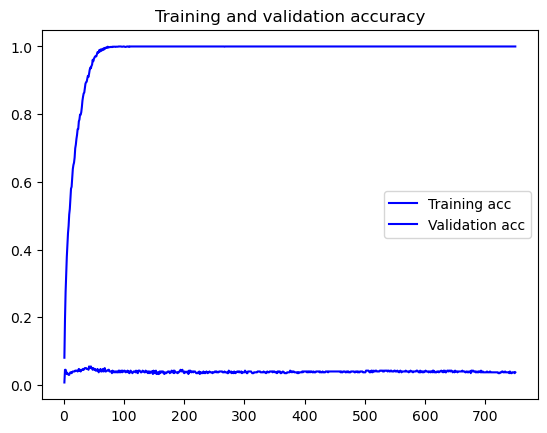

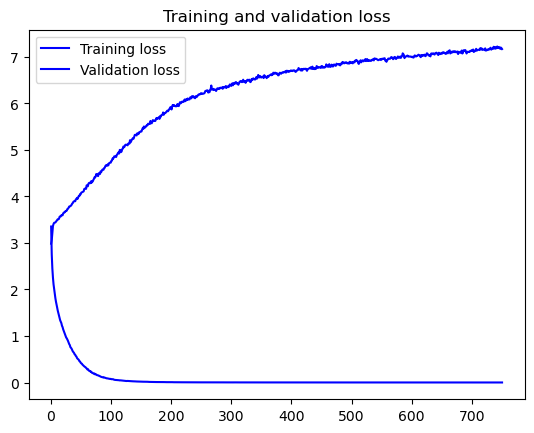

In [203]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()